In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
df = pd.read_csv('beginner_datasets/france.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


Aşama 1: Boş Verilerin Tespit Edilip Temizlenmesi

In [332]:
df.loc[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3467,556924,82552,WASHROOM METAL SIGN,1,6/15/2011 14:14,1.45,NaN,France
3468,556924,21165,BEWARE OF THE CAT METAL SIGN,1,6/15/2011 14:14,1.69,NaN,France
3469,556924,47503A,ASS FLORAL PRINT MULTI SCREWDRIVER,1,6/15/2011 14:14,1.25,NaN,France
3470,556924,23154,SET OF 4 JAM JAR MAGNETS,3,6/15/2011 14:14,2.08,NaN,France
3471,556924,23156,SET OF 5 MINI GROCERY MAGNETS,3,6/15/2011 14:14,2.08,NaN,France
...,...,...,...,...,...,...,...,...
7244,575759,22617,BAKING SET SPACEBOY DESIGN,1,11/11/2011 10:50,4.95,NaN,France
7245,575759,84836,ZINC METAL HEART DECORATION,24,11/11/2011 10:50,1.25,NaN,France
7246,575759,21811,HANGING HEART WITH BELL,48,11/11/2011 10:50,0.39,NaN,France
7247,575759,21822,GLITTER CHRISTMAS TREE WITH BELLS,12,11/11/2011 10:50,0.79,NaN,France


In [333]:
df.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64

In [334]:
df.shape

(8557, 8)

In [335]:
df.isna().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID     66
Country         0
dtype: int64

In [336]:
df.dropna(axis=0,inplace=True)

In [337]:
df.isna().sum(),df.shape

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 (8491, 8))

Verilerin dönüştürülmesi (encoding)

In [338]:
df = pd.read_csv(r"beginner_datasets/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [339]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [340]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [341]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [342]:
df = pd.read_csv(r"beginner_datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [343]:
def numeric_features(dataset):#features
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()


In [344]:
numeric_features(df)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [345]:
categorical_features(df)

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [347]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
# 5   region    1338 non-null   object 
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5])],
remainder='passthrough')
dfEncoded1 = pd.DataFrame(ct.fit_transform(df))
dfEncoded1.head()


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,19,female,27.9,0,yes,16884.924
1,0.0,0.0,1.0,0.0,18,male,33.77,1,no,1725.5523
2,0.0,0.0,1.0,0.0,28,male,33.0,3,no,4449.462
3,0.0,1.0,0.0,0.0,33,male,22.705,0,no,21984.47061
4,0.0,1.0,0.0,0.0,32,male,28.88,0,no,3866.8552


In [348]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfEncoded1[5] = le.fit_transform(dfEncoded1[5])
dfEncoded1[8] = le.fit_transform(dfEncoded1[8])
dfEncoded1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,19,0,27.9,0,1,16884.924
1,0.0,0.0,1.0,0.0,18,1,33.77,1,0,1725.5523
2,0.0,0.0,1.0,0.0,28,1,33.0,3,0,4449.462
3,0.0,1.0,0.0,0.0,33,1,22.705,0,0,21984.47061
4,0.0,1.0,0.0,0.0,32,1,28.88,0,0,3866.8552


Aykırı Verilerin Tespiti ve Temizlenmesi

In [349]:
datasetAdress = 'beginner_datasets/diabetes.csv'
df = pd.read_csv(datasetAdress)
df.columns = ["pregnant","glucose","bloodp","skinthick","insulin",
"bmi","pedigree","age","target"]
df.head()

,pregnant,glucose,bloodp,skinthick,insulin,bmi,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [350]:

df.describe()

,pregnant,glucose,bloodp,skinthick,insulin,bmi,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


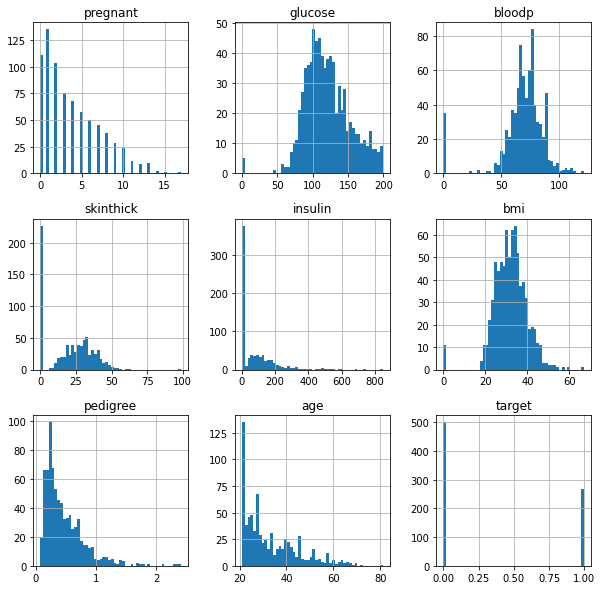

In [351]:
df.hist(figsize=(10,10),bins=50);

IQR ile aykırı verilerin tespiti

In [352]:
Q1 = df.quantile(0.25)
Q1

pregnant      1.00000
glucose      99.00000
bloodp       62.00000
skinthick     0.00000
insulin       0.00000
bmi          27.30000
pedigree      0.24375
age          24.00000
target        0.00000
Name: 0.25, dtype: float64

In [353]:
Q3 = df.quantile(0.75)
Q3

pregnant       6.00000
glucose      140.25000
bloodp        80.00000
skinthick     32.00000
insulin      127.25000
bmi           36.60000
pedigree       0.62625
age           41.00000
target         1.00000
Name: 0.75, dtype: float64

In [354]:
IQR = Q3 - Q1
IQR

pregnant       5.0000
glucose       41.2500
bloodp        18.0000
skinthick     32.0000
insulin      127.2500
bmi            9.3000
pedigree       0.3825
age           17.0000
target         1.0000
dtype: float64

In [355]:
df < (Q1 - 1.5 * IQR)

,pregnant,glucose,bloodp,skinthick,insulin,bmi,pedigree,age,target
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [356]:
df > (Q3 + 1.5 * IQR)

,pregnant,glucose,bloodp,skinthick,insulin,bmi,pedigree,age,target
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [357]:
import warnings
warnings.filterwarnings('ignore')

In [358]:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ["Feature", "Outlier"])
    for col in cols:
        if col in df.select_dtypes(include=np.number).columns:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - 1.5 * iqr
            fence_high = q3 + 1.5 * iqr
            outliers = outliers.append({'Feature':col,'Number of Outliers':df.loc[(df[col] < fence_low) | (df[col] > fence_high)].shape[0]}, ignore_index=True)
    return outliers
detect_outliers(df)

,Feature,Outlier,Number of Outliers
0,pregnant,NaN,4.0
1,glucose,NaN,5.0
2,bloodp,NaN,45.0
3,skinthick,NaN,1.0
4,insulin,NaN,34.0
5,bmi,NaN,19.0
6,pedigree,NaN,29.0
7,age,NaN,9.0
8,target,NaN,0.0


Dağılıma bakarak aykırı verilerin tespiti

In [359]:
df.bmi.skew()

-0.42898158845356543

Veriyi Görselleştirerek Aykırı Verilerin Tespiti

<AxesSubplot:>

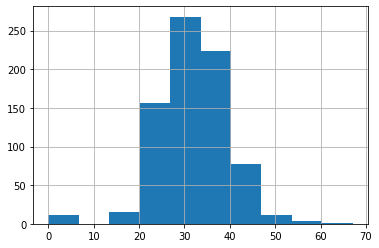

In [360]:
df.bmi.hist()

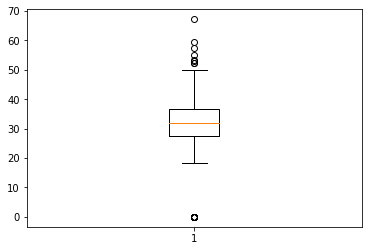

In [361]:
plt.boxplot(df.bmi);

In [362]:
df.head()

,pregnant,glucose,bloodp,skinthick,insulin,bmi,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


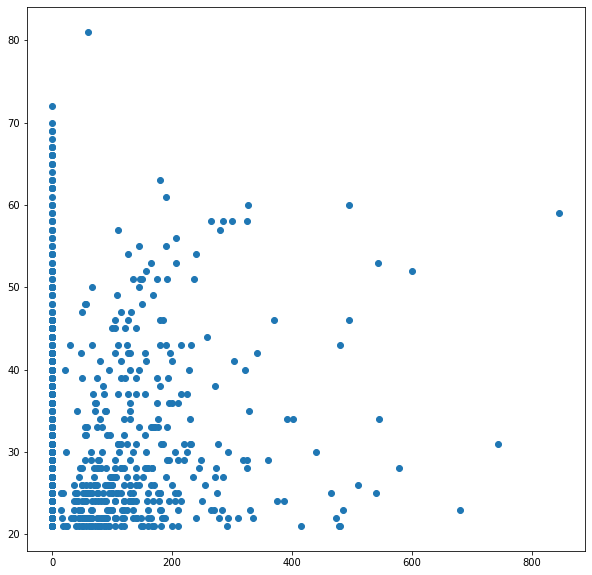

In [363]:
fig,ax = plt.subplots(figsize=(10,10))
ax.scatter(df.insulin,df.age)

Aykırı verilerin giderilmesi

Dağılım Bazı Giderim

<AxesSubplot:>

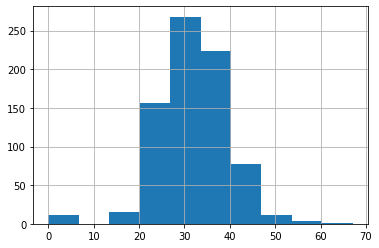

In [364]:
df.bmi.hist()

In [365]:
df.bmi.quantile(0.10),df.bmi.quantile(0.90)

(23.6, 41.5)

In [366]:
# df.bmi = np.where(df.bmi < 21.8, 21.8,df.bmi)
# df.bmi = np.where(df.bmi > 44.39, 44.39,df.bmi)

In [367]:
# df.bmi.hist(bins=10)

Kırpma

In [368]:
df.bmi.min(),df.bmi.max(),

(0.0, 67.1)

In [369]:
# index=df[(df.bmi >= 60)|(df.bmi<= 18)].index
# df.drop(index,inplace=True)
# df.bmi.describe()

IQR Skour üzerinden aykırı verilerin temizlenmesi

In [370]:
df_cikti = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 *
IQR))).any(axis=1)]
df_cikti

,pregnant,glucose,bloodp,skinthick,insulin,bmi,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


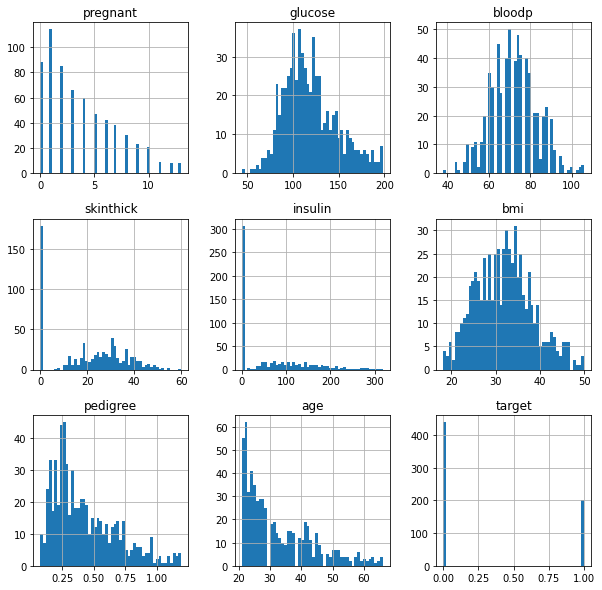

In [371]:
df_cikti.hist(figsize=(10,10),bins=50);

In [372]:
# df["colRes"] = df["insulin"].map(lambda i: np.log(i) if i > 0 else 0)
# df["colRes"].hist();


<AxesSubplot:>

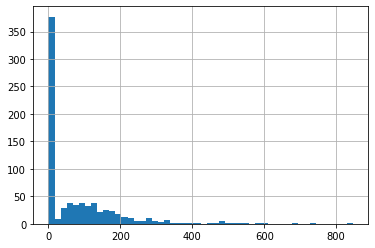

In [373]:
df.insulin.hist(bins=50)

In [374]:
# var1 = df['insulin'].quantile(0.50)
# var2 = df['insulin'].quantile(0.10)
# df['insulin'] = np.where(df['insulin'] < var2, var1, df['insulin'])

In [375]:
# df.insulin.replace(to_replace=0,value=df.insulin.mean(),inplace=True)

<AxesSubplot:>

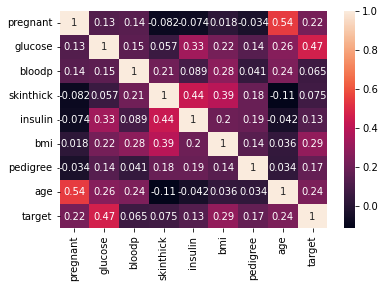

In [376]:
corr = df.corr(method="pearson")
sns.heatmap(corr,annot=True)

### Verilerin Bölümlenmesi

In [377]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [379]:
label = df.target.copy()
features = df.drop("target",axis=1)


In [384]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [386]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,24.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,37.0,370.0,46.2,0.238,46.0
...,...,...,...,...,...,...,...,...
609,5.0,139.0,64.0,35.0,140.0,28.6,0.411,26.0
610,1.0,96.0,122.0,0.0,0.0,22.4,0.207,27.0
611,10.0,101.0,86.0,37.0,0.0,45.6,1.136,38.0
612,0.0,141.0,0.0,0.0,0.0,42.4,0.205,29.0


In [383]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7
0,6.0,98.0,58.0,33.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,32.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,0.0,29.9,0.210,50.0
...,...,...,...,...,...,...,...,...
149,9.0,165.0,88.0,0.0,0.0,30.4,0.302,49.0
150,1.0,77.0,56.0,30.0,56.0,33.3,1.251,24.0
151,8.0,95.0,72.0,0.0,0.0,36.8,0.485,57.0
152,2.0,146.0,70.0,38.0,360.0,28.0,0.337,29.0


In [387]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
Xtrain_olcek = sc.transform(X_train)
# X_trainolcekli = sc.fit_transform(X_train)
pd.DataFrame(Xtrain_olcek)

,0,1,2,3,4,5,6,7
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929
